<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/cov_analysis_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import numpy as np
import scipy.cluster.hierarchy as sch
import sklearn
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv('result_619_cov.csv')
df.columns = [col.lower() for col in df.columns]
df.head()

,week_start_date,week_end_date,consumer_selling_cd,smic_group_cd,store_id,reg_unit_prc,promo_unit_prc,total_gross_amt,total_item_qty,total_mkdn_qty,...,r52w_total_mkdn_pod_alloc_amt_avg,r52w_total_gross_amt_std,r52w_total_item_qty_std,r52w_total_mkdn_qty_std,r52w_total_mkdn_amt_std,r52w_total_net_amt_std,r52w_total_mkdn_wod_alloc_amt_std,r52w_total_mkdn_pod_alloc_amt_std,cov_r52w_total_item_qty,cov_r52w_total_mkdn_qty
0,2019-12-29,2020-01-04,464561,25,619,3.29,NaN,26.91,9,0,...,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-29,2020-01-04,464241,11,619,4.19,2.50,47.86,14,6,...,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-29,2020-01-04,460913,11,619,4.99,4.69,84.83,17,25,...,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-29,2020-01-04,322557,11,619,3.99,2.50,516.52,148,246,...,-0.1363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-29,2020-01-04,322554,11,619,3.99,2.50,474.81,119,182,...,-0.0375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   week_start_date                    3011 non-null   object 
 1   week_end_date                      3011 non-null   object 
 2   consumer_selling_cd                3011 non-null   int64  
 3   smic_group_cd                      3011 non-null   int64  
 4   store_id                           3011 non-null   int64  
 5   reg_unit_prc                       3011 non-null   float64
 6   promo_unit_prc                     1229 non-null   float64
 7   total_gross_amt                    3011 non-null   float64
 8   total_item_qty                     3011 non-null   int64  
 9   total_mkdn_qty                     3011 non-null   int64  
 10  total_mkdn_amt                     3011 non-null   float64
 11  total_net_amt                      3011 non-null   float

In [4]:
df.describe()

,consumer_selling_cd,smic_group_cd,store_id,reg_unit_prc,promo_unit_prc,total_gross_amt,total_item_qty,total_mkdn_qty,total_mkdn_amt,total_net_amt,...,r52w_total_mkdn_pod_alloc_amt_avg,r52w_total_gross_amt_std,r52w_total_item_qty_std,r52w_total_mkdn_qty_std,r52w_total_mkdn_amt_std,r52w_total_net_amt_std,r52w_total_mkdn_wod_alloc_amt_std,r52w_total_mkdn_pod_alloc_amt_std,cov_r52w_total_item_qty,cov_r52w_total_mkdn_qty
count,3011.000000,3011.000000,3011.0,3011.000000,1229.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,...,3011.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.0,2991.000000,2991.000000,2977.000000
mean,276082.735304,17.932581,619.0,3.761281,2.835265,213.889973,59.621056,52.505812,-66.450830,147.439143,...,-0.233622,144.698698,43.067760,65.612915,76.550735,74.917159,0.0,0.680395,0.662383,1.521776
std,116768.133963,7.000838,0.0,1.274607,2.211585,244.716998,61.714084,108.085730,161.904092,100.070690,...,0.289234,128.833279,32.856326,65.929040,101.996184,33.502302,0.0,1.261012,0.270218,0.672326
min,146385.000000,11.000000,619.0,1.490000,0.000000,3.980000,1.000000,0.000000,-3137.000000,2.500000,...,-1.966105,7.056926,1.414214,0.000000,0.000000,3.238549,0.0,0.000000,0.078567,0.074432
25%,146453.000000,11.000000,619.0,2.990000,1.990000,79.800000,24.000000,0.000000,-51.215000,75.620000,...,-0.260265,60.550577,18.080438,20.371395,11.611686,52.047281,0.0,0.218539,0.420051,1.043871
50%,322058.000000,11.000000,619.0,3.990000,2.500000,139.720000,40.000000,7.000000,-4.460000,126.350000,...,-0.155861,105.127442,37.958499,40.149908,33.020817,72.671110,0.0,0.390336,0.649709,1.340419
75%,322554.000000,25.000000,619.0,4.490000,2.990000,247.050000,71.000000,61.000000,0.000000,194.920000,...,-0.074878,171.573248,59.719016,91.222047,98.864640,91.440249,0.0,0.585196,0.825869,1.891559
max,464561.000000,25.000000,619.0,10.990000,50.000000,4325.160000,1084.000000,2054.000000,0.000000,1188.160000,...,0.000000,753.475538,188.840987,367.634587,555.244670,211.498592,0.0,8.273575,1.443754,3.894274


In [9]:
orig_df = copy.deepcopy(df)

In [12]:
df.set_index('week_end_date', inplace = True)

Processing 464561


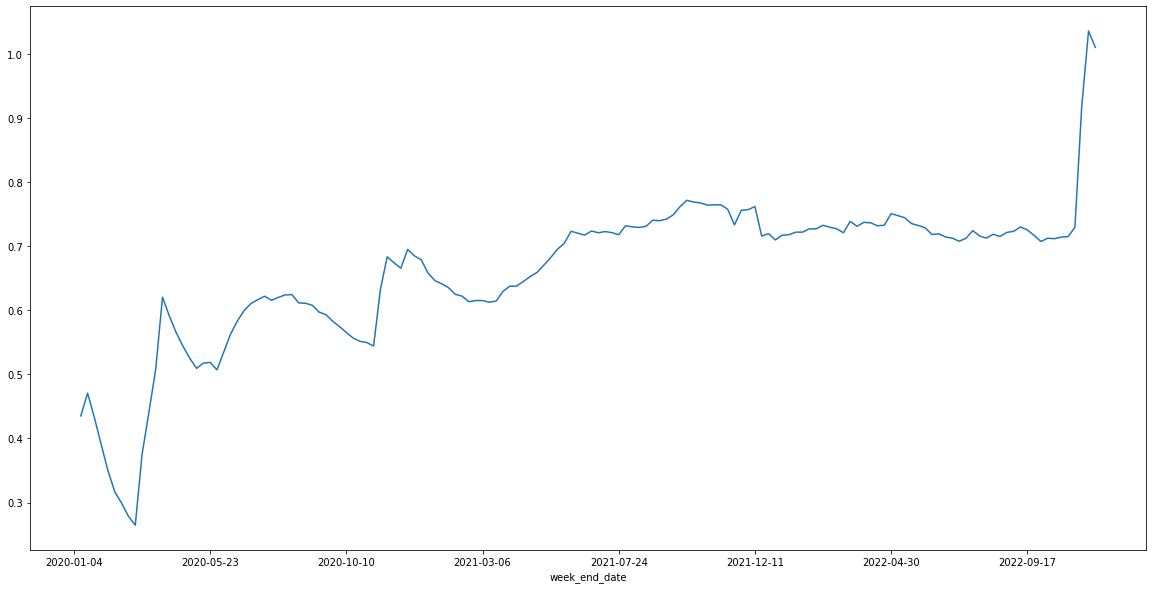

Processing 464241


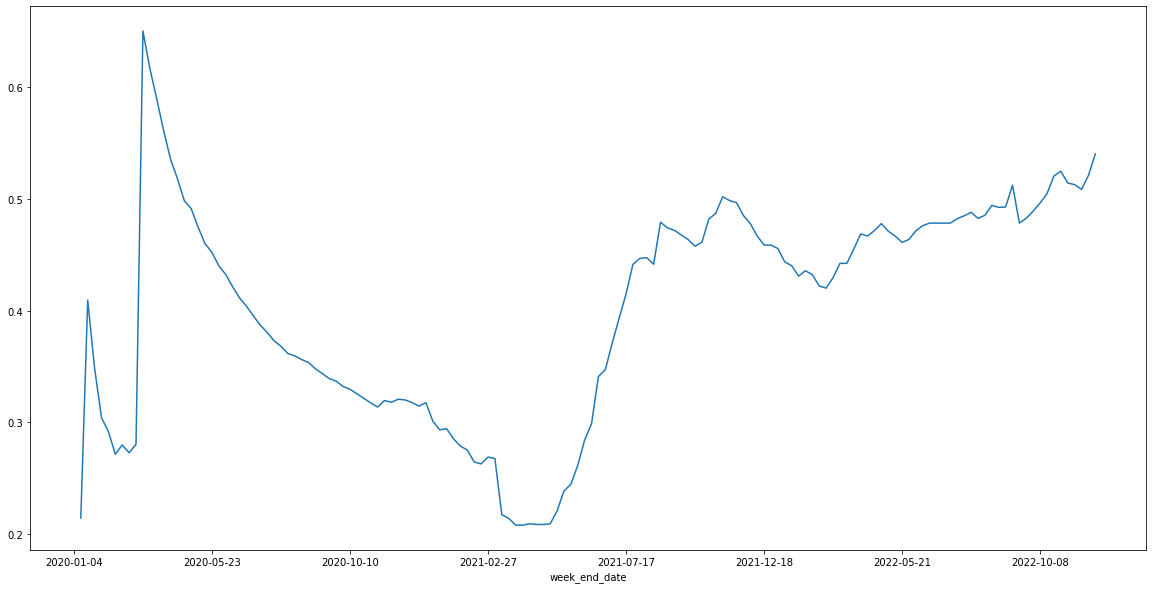

Processing 460913


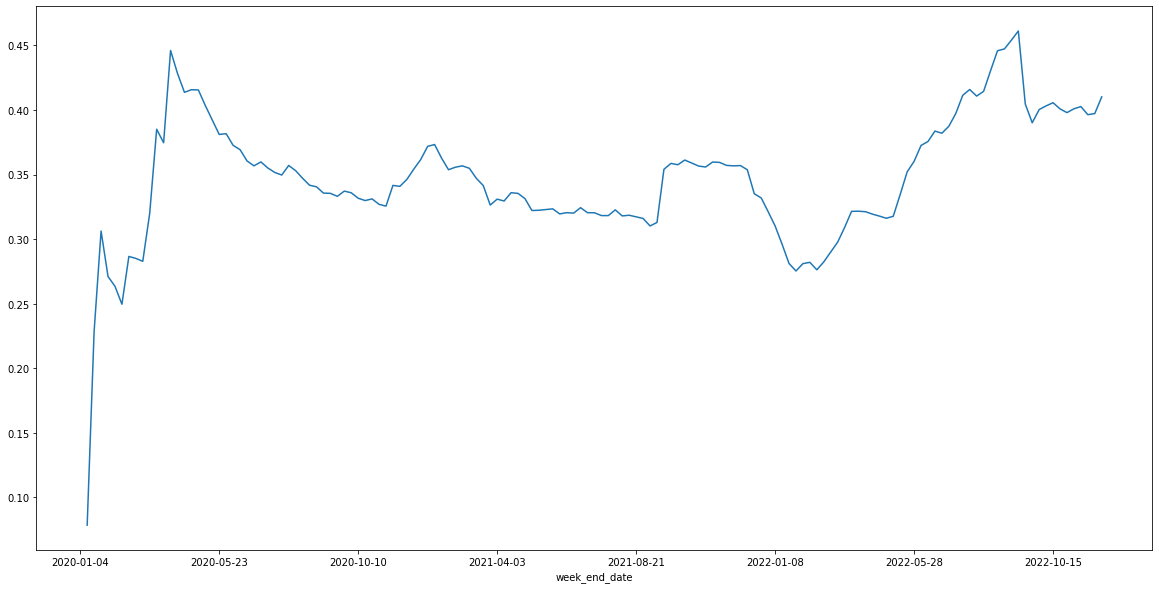

Processing 322557


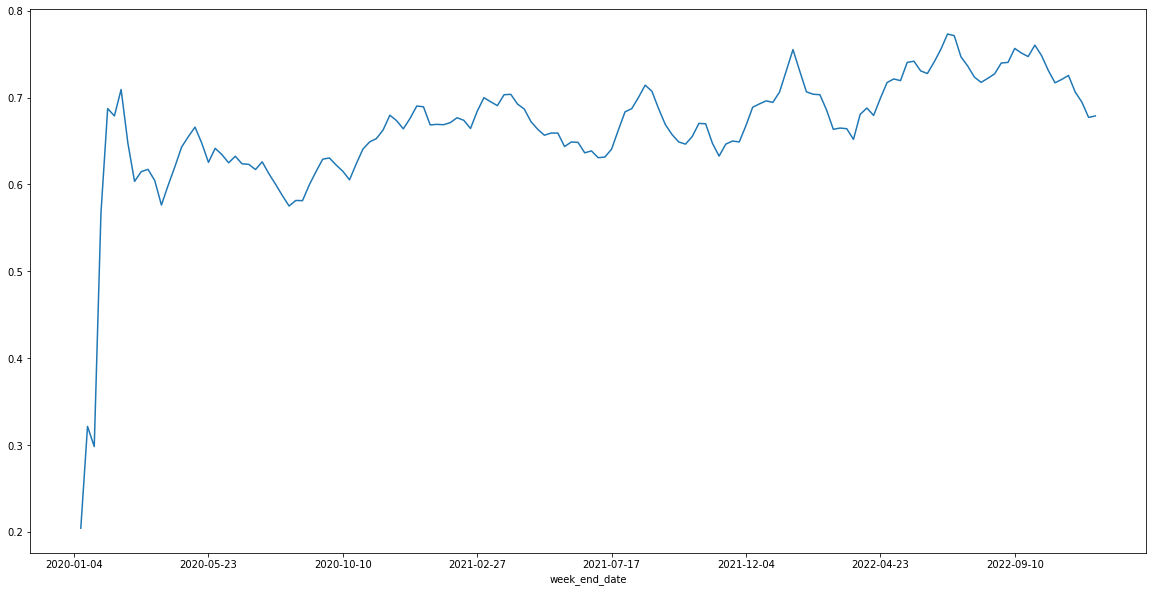

Processing 322554


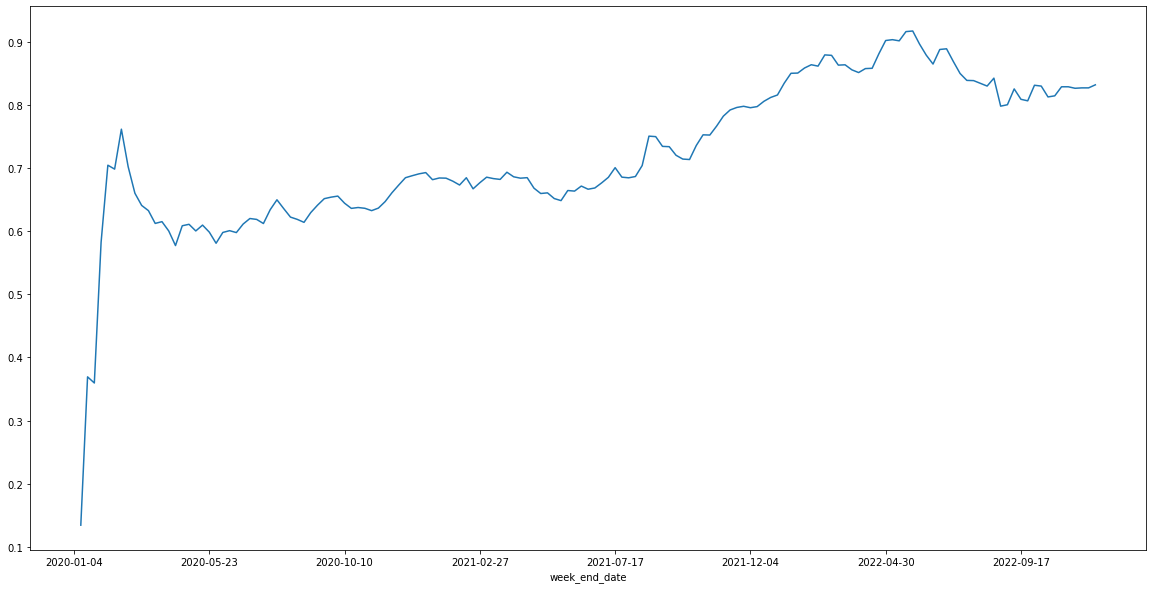

Processing 322087


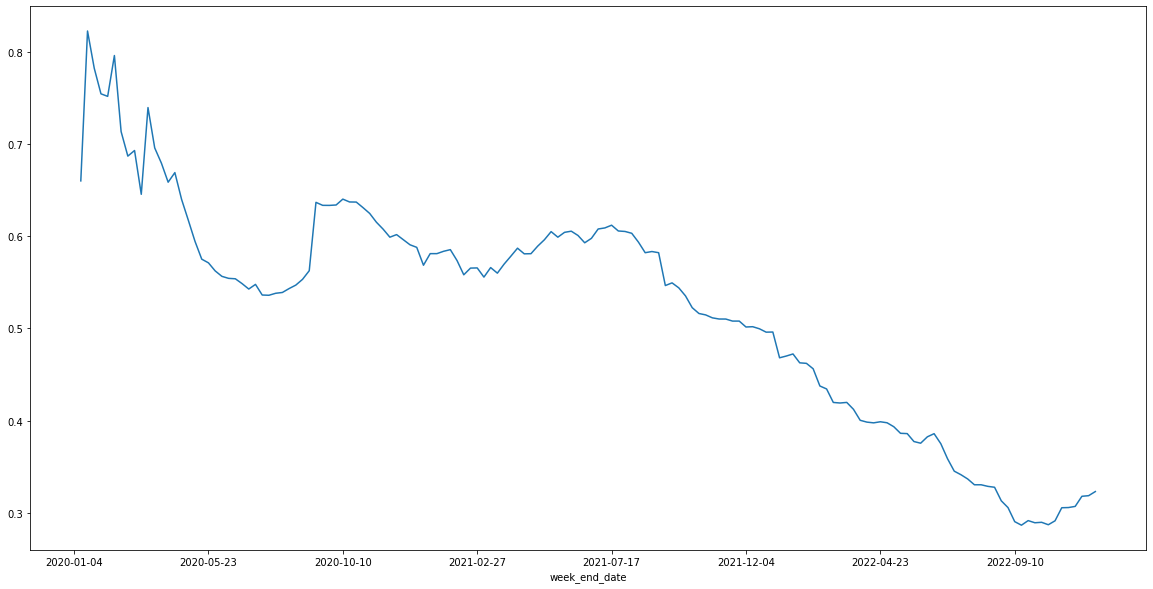

Processing 322082


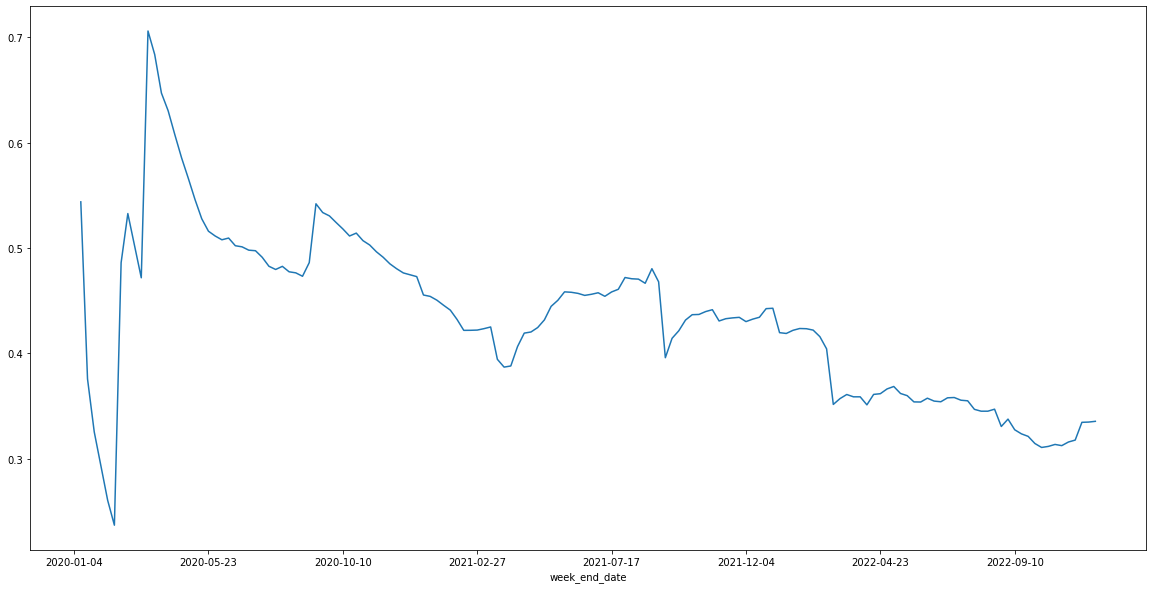

Processing 322060


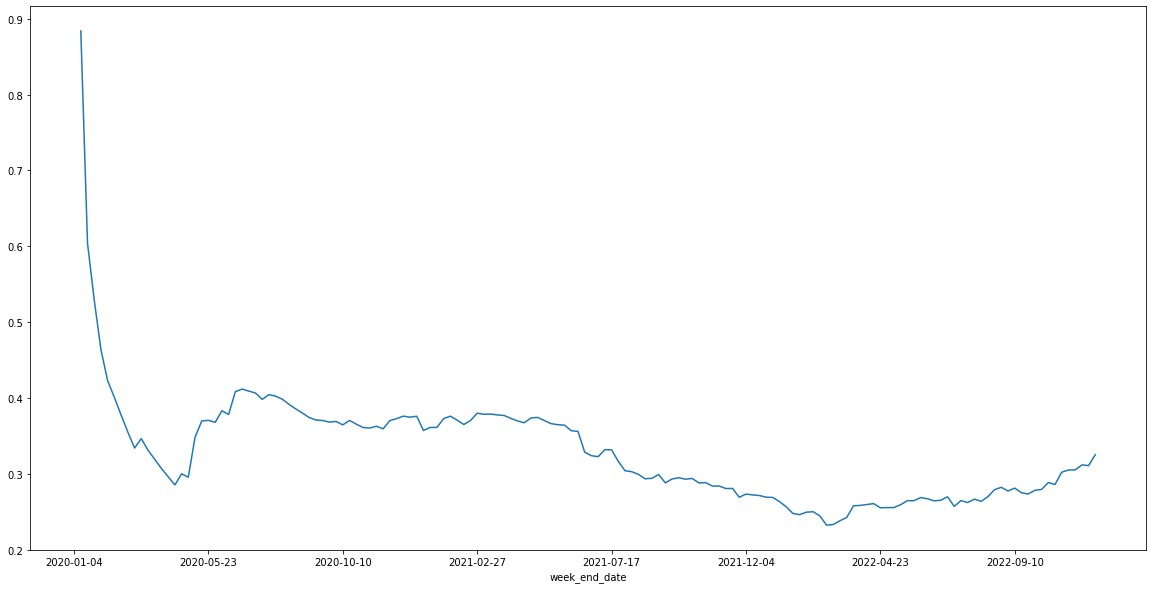

Processing 322059


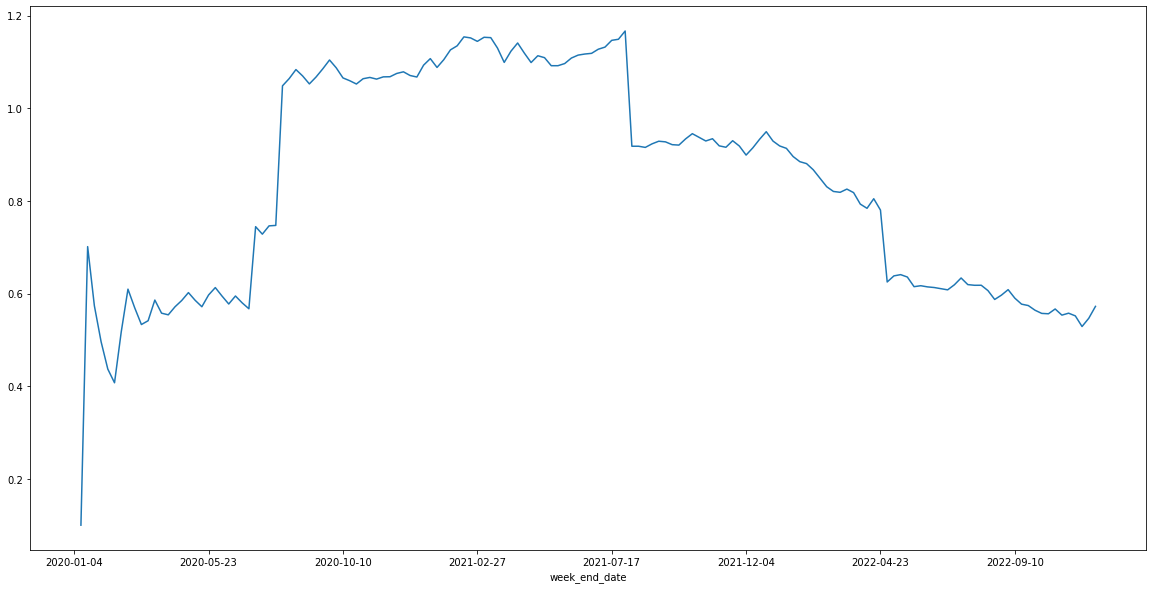

Processing 322058


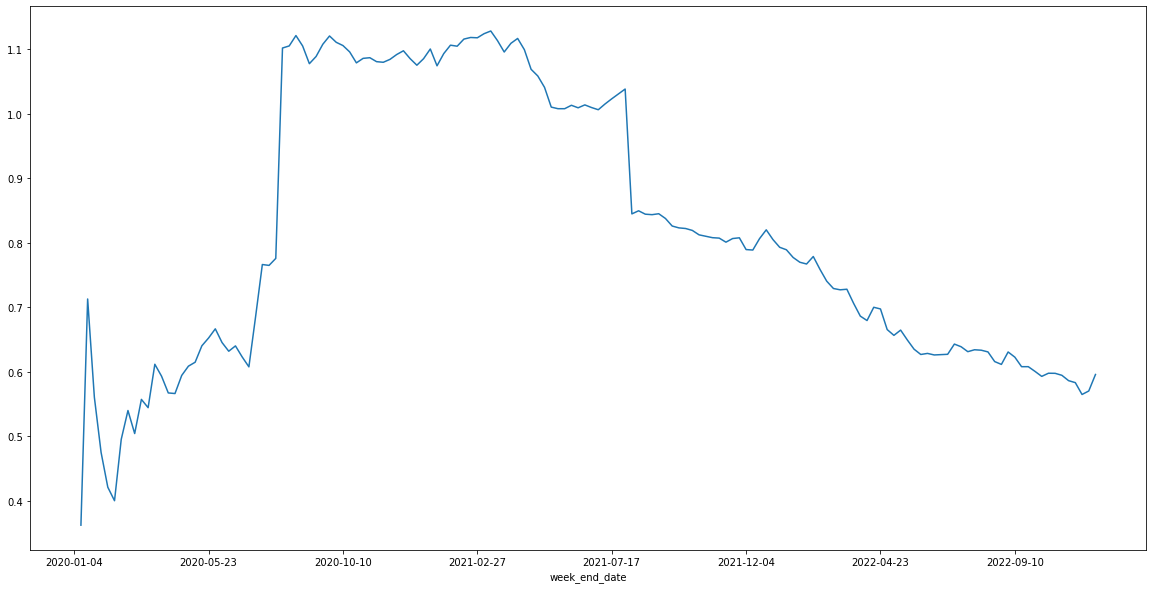

Processing 322045


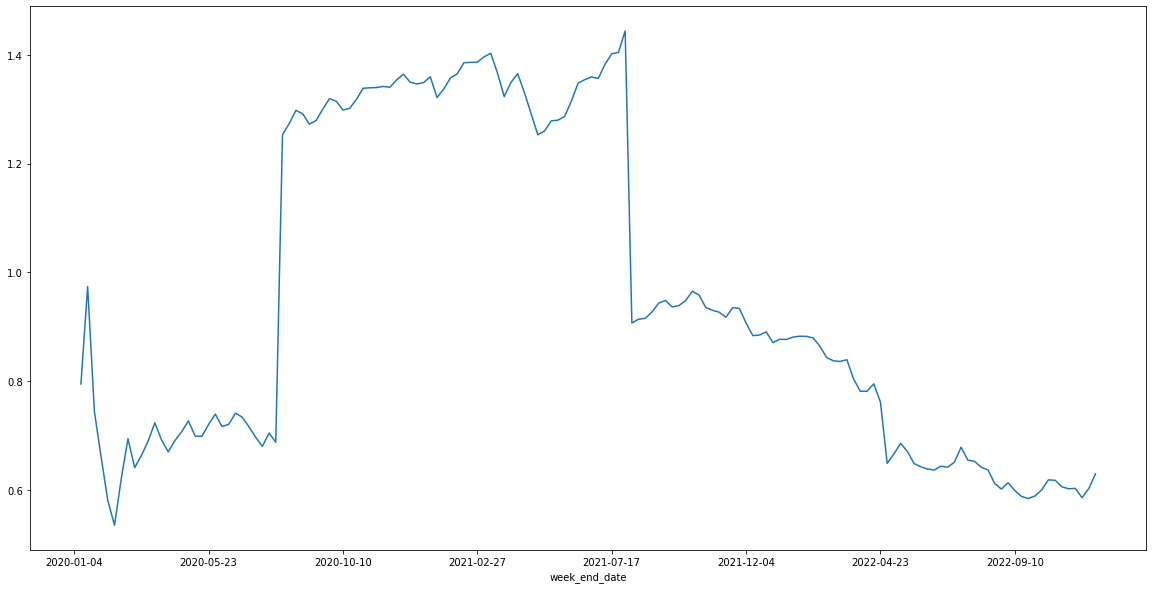

Processing 146835


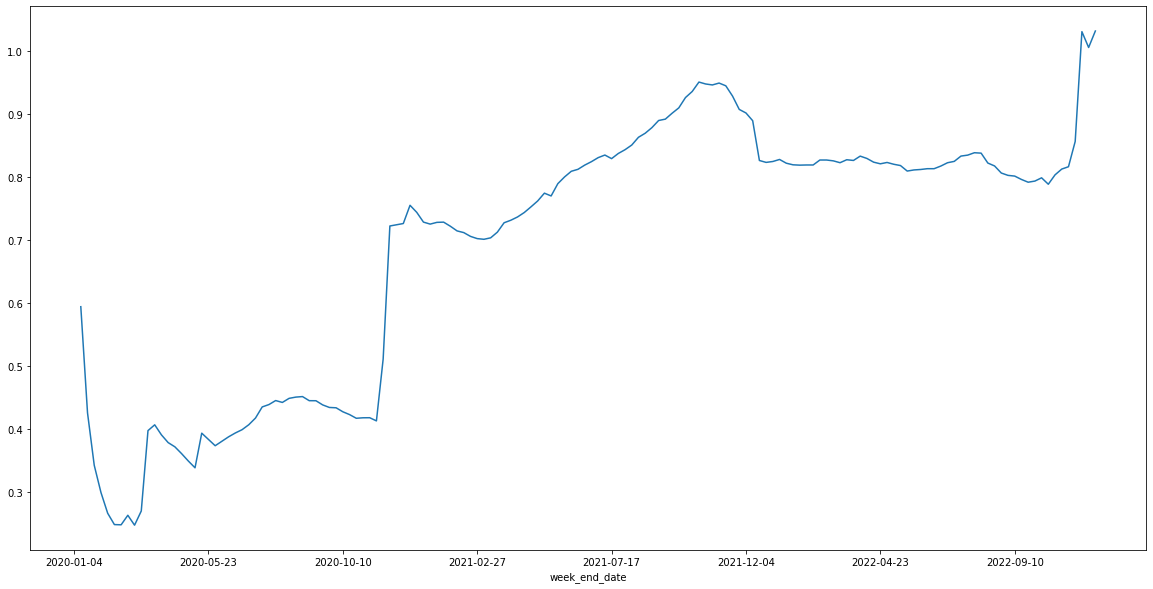

Processing 146761


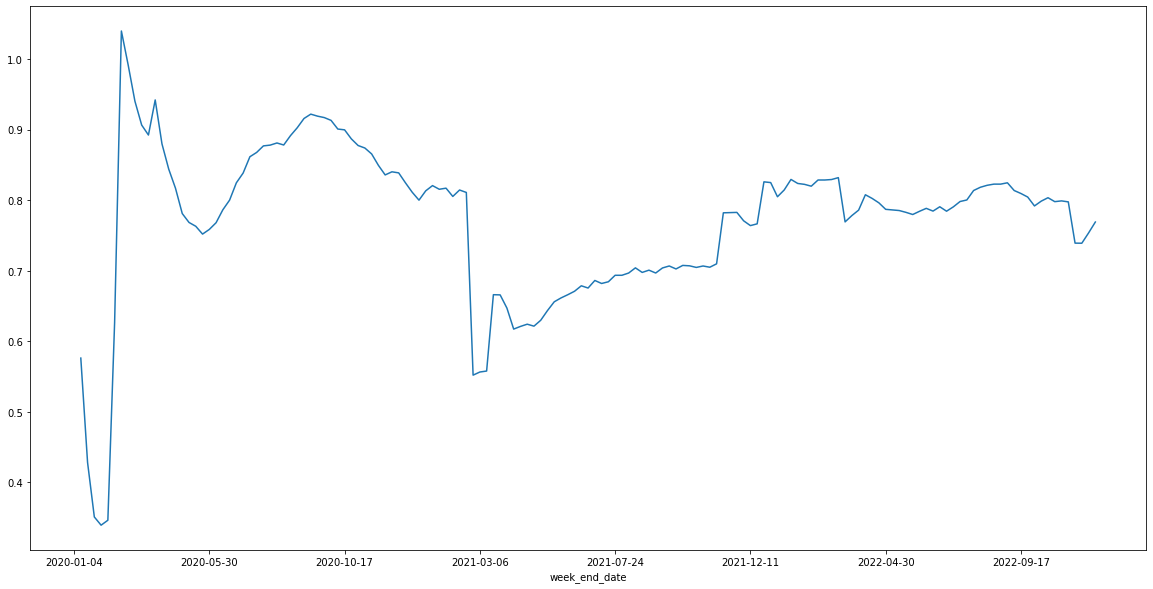

Processing 146675


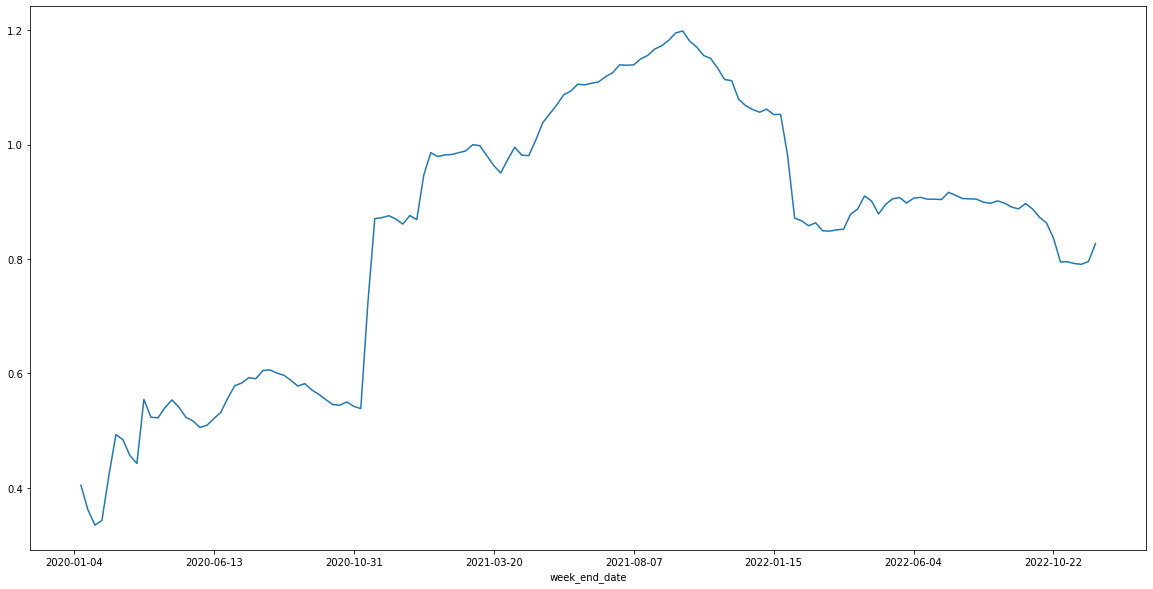

Processing 146453


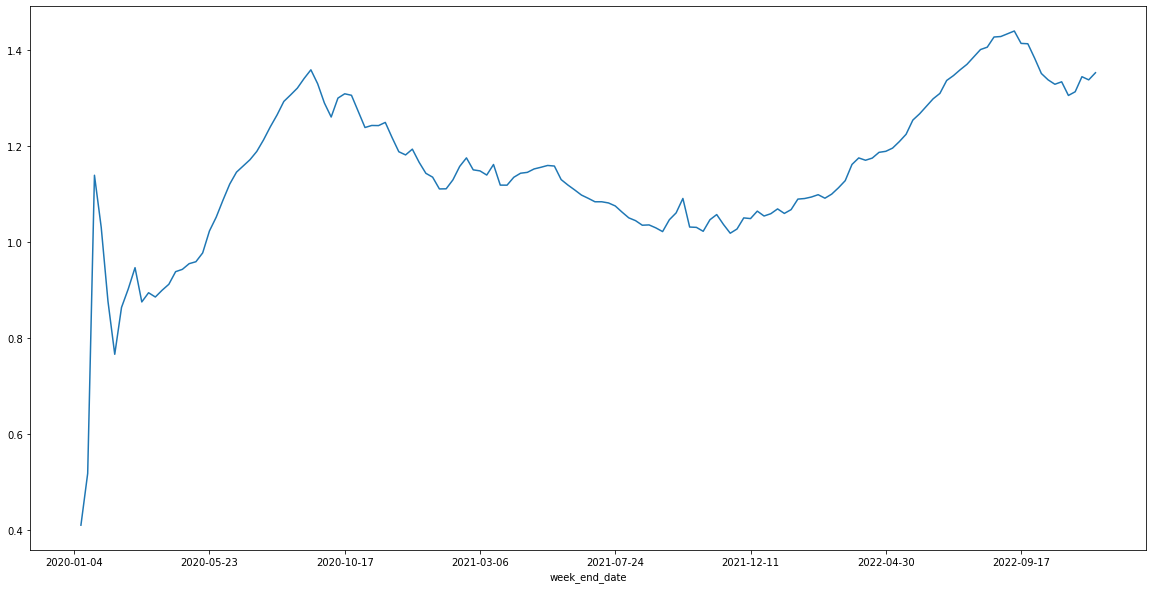

Processing 146408


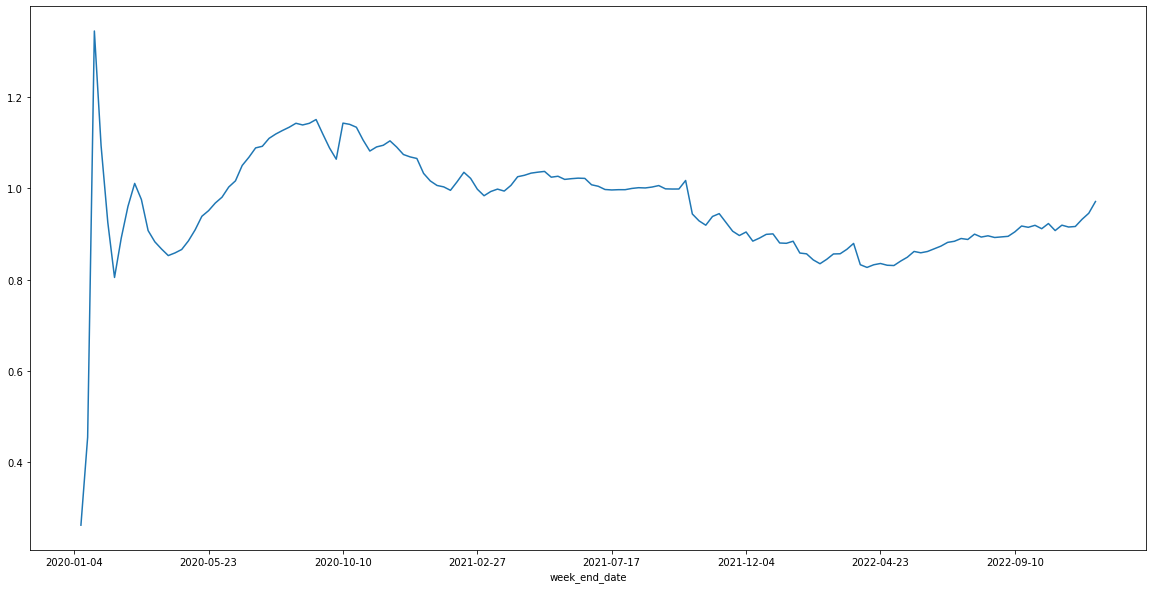

Processing 146399


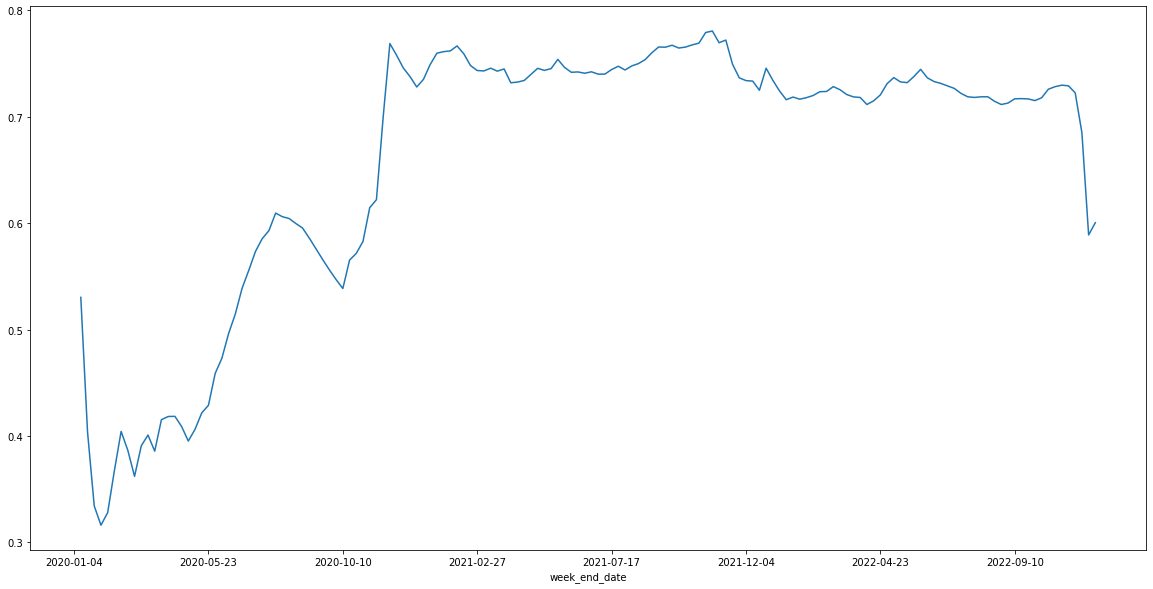

Processing 146393


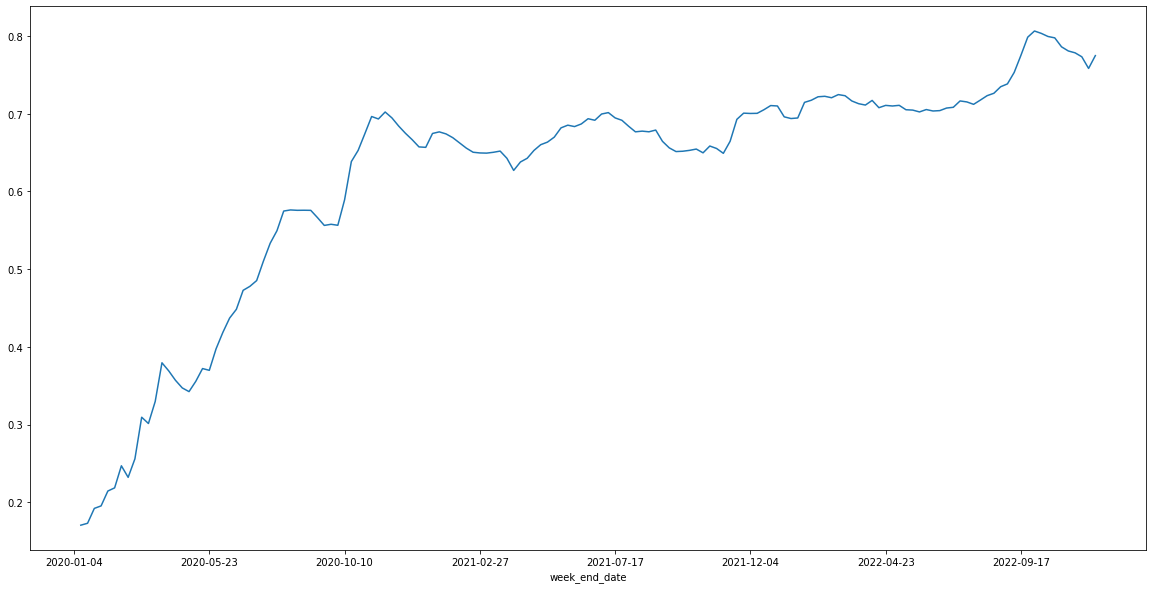

Processing 146385


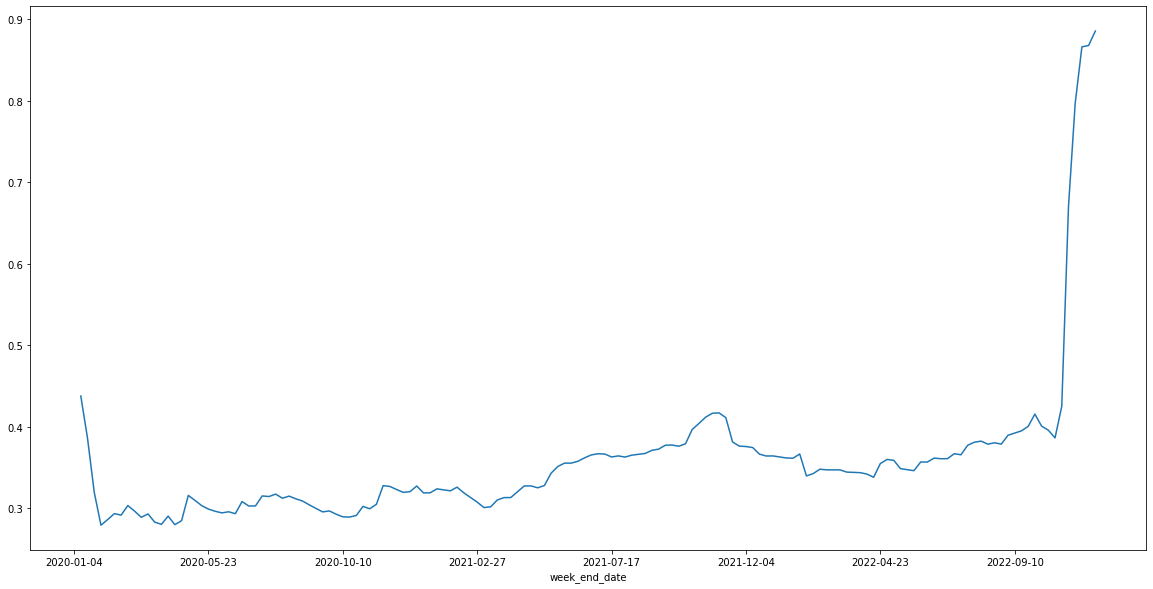

Processing 413364


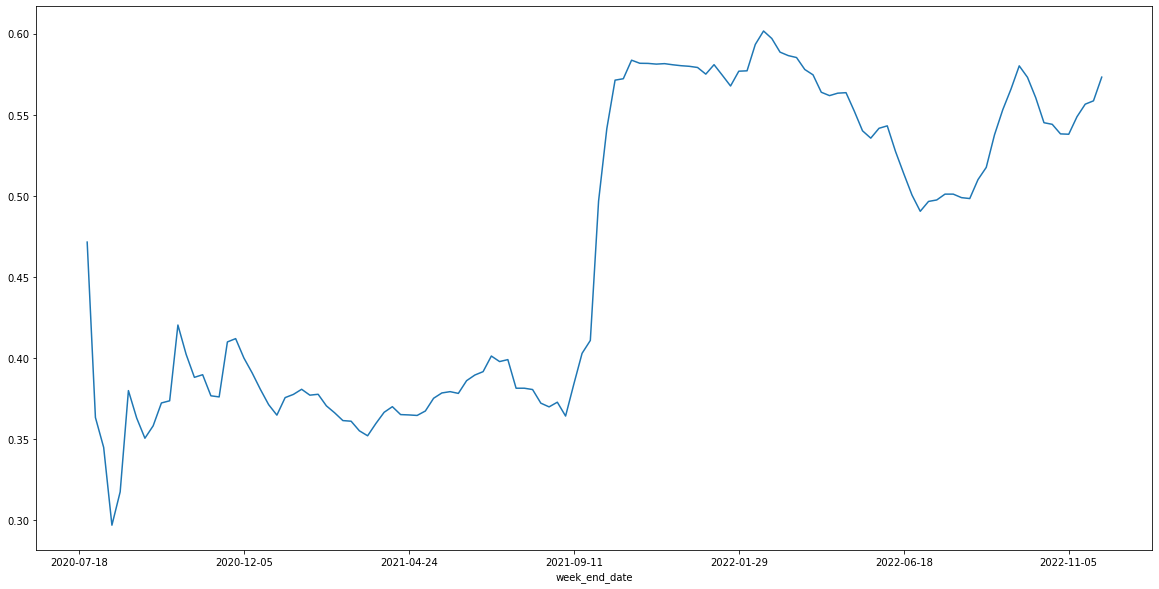

In [17]:
for item in df['consumer_selling_cd'].drop_duplicates().values.tolist():
    print(f"Processing {item}")
    df[df.consumer_selling_cd == item]['cov_r52w_total_item_qty'].plot(figsize = (20,10))
    plt.show(block = False)

In [32]:
consumer_selling_cd_list = df['consumer_selling_cd'].values.tolist()
df = df.dropna()
df_processed = df[['consumer_selling_cd', 'cov_r52w_total_item_qty', 'total_item_qty']]
X = np.array(df_processed.values)
X

array([[4.60913000e+05, 7.85674201e-02, 1.90000000e+01],
       [3.22557000e+05, 2.04366122e-01, 1.98000000e+02],
       [3.22554000e+05, 1.34430947e-01, 1.44000000e+02],
       ...,
       [1.46761000e+05, 7.68943806e-01, 1.20000000e+01],
       [1.46675000e+05, 8.26613649e-01, 2.00000000e+00],
       [1.46385000e+05, 8.85646069e-01, 8.00000000e+00]])

In [33]:
df_processed.isna().sum()

consumer_selling_cd        0
cov_r52w_total_item_qty    0
total_item_qty             0
dtype: int64

In [34]:
df_processed[df_processed.cov_r52w_total_item_qty.isna()]

,consumer_selling_cd,cov_r52w_total_item_qty,total_item_qty
week_end_date,,,


In [35]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [42]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_std)
    kmeanModel.fit(X_std)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

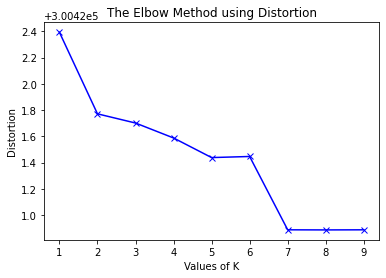

In [43]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [44]:
# Create k-mean object
clt = KMeans(n_clusters = 5, random_state=0)

# Train model
model = clt.fit(X_std)

In [45]:
# View predict class
model.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [46]:
# View cluster centers
model.cluster_centers_

array([[ 0.94727927, -1.04977466, -0.62169407],
       [-1.55957416,  0.19899143, -0.04223649],
       [-0.21971329,  0.59164625,  2.54465338],
       [ 0.2005794 ,  1.7902406 , -0.01947361],
       [ 0.25759942,  0.02179537,  0.03084107]])